# Analyze Gromacs gro files

## Import packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from upsetplot import UpSet  # https://upsetplot.readthedocs.io/en/stable/index.html
import yaml

%matplotlib inline
plt.rcParams.update({"font.size": 20})

## Load data

In [3]:
gro_df = pd.read_csv("../data/gromacs_gro_files_info.tsv", sep="\t")
print(gro_df.shape)
gro_df.head()

(9005, 9)


,dataset_origin,dataset_id,atom_number,has_protein,has_nucleic,has_lipid,has_water_ion,has_glucid,filename
0,osf,6fuqs,3468,True,False,False,False,False,Trajectories/4_su.gro
1,osf,6fuqs,3468,True,False,False,False,False,Trajectories/6_su.gro
2,osf,6fuqs,3468,True,False,False,False,False,Trajectories/3_su.gro
3,osf,6fuqs,3468,True,False,False,False,False,Trajectories/8_su.gro
4,osf,6fuqs,3468,True,False,False,False,False,Trajectories/2_su.gro


## Proteins, lipids and nucleic acids

In [4]:
print(f"Total number of gro files analyzed: {gro_df.shape[0]}")
print(f"Number of gro files with protein: {gro_df.query('has_protein==True').shape[0]}")
print(f"Number of gro files with lipid: {gro_df.query('has_lipid==True').shape[0]}")
print(f"Number of gro files with nucleic acid: {gro_df.query('has_nucleic==True').shape[0]}")
print(f"Number of gro files with protein and lipid: {gro_df.query('has_protein==True').query('has_lipid==True').shape[0]}")
print(f"Number of gro files with protein and nucleic acid: {gro_df.query('has_protein==True').query('has_nucleic==True').shape[0]}")
print(f"Number of gro files with lipid and nucleic acid: {gro_df.query('has_lipid==True').query('has_nucleic==True').shape[0]}")

Total number of gro files analyzed: 9005
Number of gro files with protein: 4259
Number of gro files with lipid: 4502
Number of gro files with nucleic acid: 1216
Number of gro files with protein and lipid: 2728
Number of gro files with protein and nucleic acid: 91
Number of gro files with lipid and nucleic acid: 0


In [9]:
pd.set_option("display.max_rows", None)
(gro_df
 .query("has_lipid==False")
 .query("has_protein==False")
 .query("has_nucleic==False")
 .query("has_glucid==False")
 .query("has_water_ion==False")
 .query("dataset_origin=='zenodo'")
)

,dataset_origin,dataset_id,atom_number,has_protein,has_nucleic,has_lipid,has_water_ion,has_glucid,filename
475,zenodo,4106413,6176,False,False,False,False,False,neon.gro
541,zenodo,5060102,65,False,False,False,False,False,conf_3000ps.gro
542,zenodo,5060102,65,False,False,False,False,False,conf_9000ps.gro
543,zenodo,5060102,65,False,False,False,False,False,conf_6000ps.gro
544,zenodo,5060102,65,False,False,False,False,False,conf_1000ps.gro
545,zenodo,5060102,65,False,False,False,False,False,conf_4000ps.gro
546,zenodo,5060102,65,False,False,False,False,False,conf_ini.gro
547,zenodo,5060102,65,False,False,False,False,False,conf_7000ps.gro
548,zenodo,5060102,65,False,False,False,False,False,conf_10ps.gro
549,zenodo,5060102,65,False,False,False,False,False,conf_5000ps.gro


## Système size

In [5]:
print(gro_df["atom_number"].median())
gro_df.describe()

18397.0


,atom_number
count,9.005000e+03
mean,5.827436e+04
std,1.192820e+05
min,2.000000e+00
25%,8.428000e+03
50%,1.839700e+04
75%,6.075400e+04
max,5.184000e+06


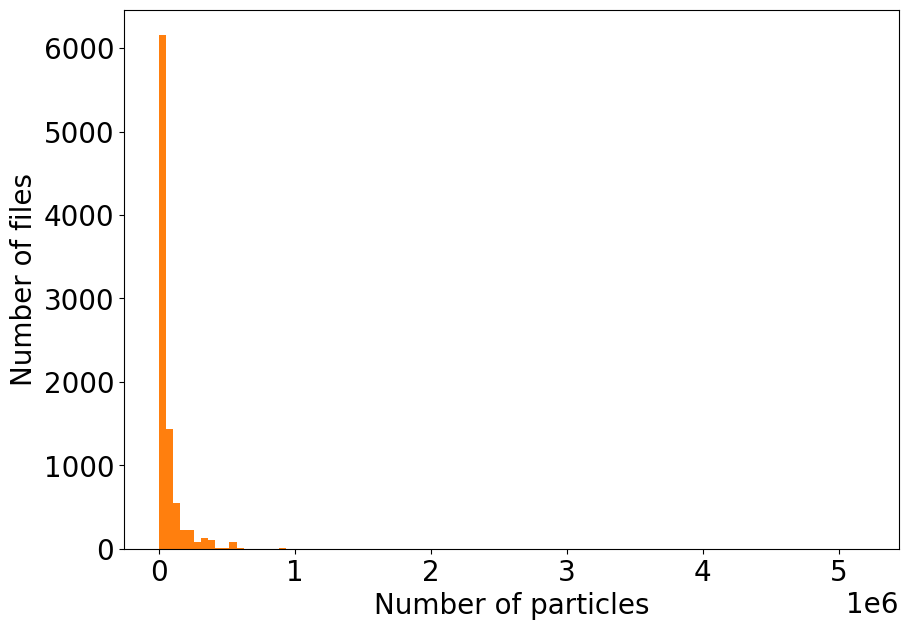

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
ax.hist(gro_df["atom_number"],
         bins=100,
         color="tab:orange")
ax.set_xlabel("Number of particles")
ax.set_ylabel("Number of files")
fig.savefig("gromacs_gro_system_size_distribution.png", dpi=300, bbox_inches="tight")
fig.savefig("gromacs_gro_system_size_distribution.svg", bbox_inches="tight")

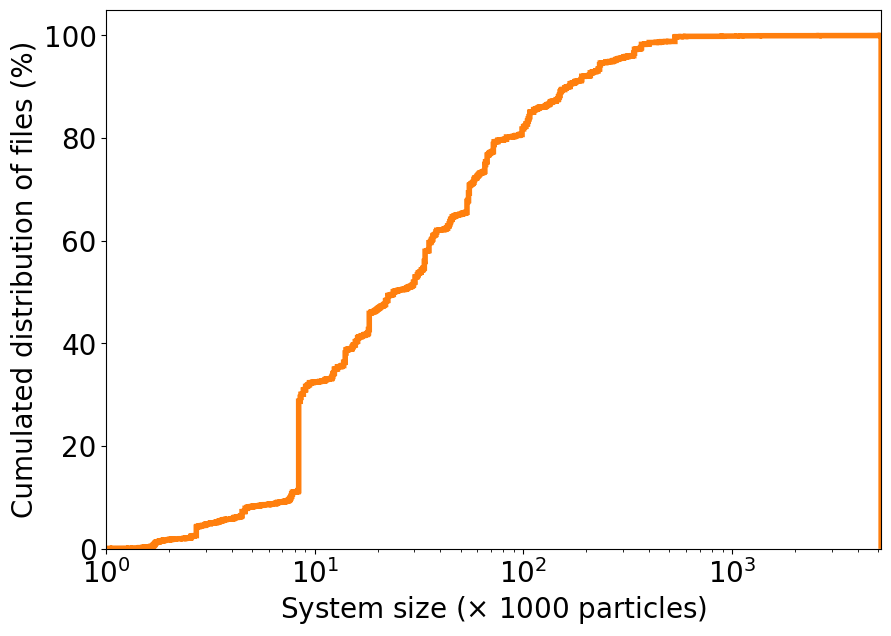

In [7]:
# Convert system size to k-particules (1000) 
gro_df["k_particles"] = gro_df["atom_number"] / 1000

logbins = np.geomspace(gro_df["k_particles"].min()+1, gro_df["k_particles"].max(), 1_000)

plt.rcParams.update({"font.size": 20})
fig, ax = plt.subplots(figsize=(10,7))
values, bins, _ = ax.hist(
    gro_df["k_particles"], 
    bins=logbins,
    color="tab:orange", linewidth=4,
    histtype="step", cumulative=True, density=True
)
ax.set_xlabel(r"System size ($\times$ 1000 particles)")
ax.set_ylabel("Cumulated distribution of files (%)")
ax.set_yticks(np.arange(0, 1.1, 0.2), [f"{value:.0f}" for value in np.arange(0, 1.1, 0.2)*100])
ax.set_xscale("log")
ax.set_xlim(1, gro_df["k_particles"].max())
plt.savefig("gromacs_gro_system_size_cumulated_distribution.png", dpi=300, bbox_inches="tight")
plt.savefig("gromacs_gro_system_size_cumulated_distribution.svg", bbox_inches="tight")

## Upset plot

Use of the library [upsetplot](https://upsetplot.readthedocs.io/en/stable/index.html)

In [8]:
df_upset = pd.pivot_table(gro_df, 
                          index=["has_protein", "has_lipid", "has_nucleic", "has_water_ion", "has_glucid"], 
                          values=["filename"], 
                          aggfunc=len)
df_upset

filename
has_protein has_lipid has_nucleic has_water_ion has_glucid          
False       False     False       False         False           1298
                                  True          False            549
                      True        False         False             11
                                  True          False           1114
            True      False       False         False            204
                                  True          False           1570
True        False     False       False         False            313
                                  True          False            902
                                                True             225
                      True        False         False             15
                                  True          False             76
            True      False       False         False            110
                                  True          False           2618

In [9]:
# Convert pivot dataframe to Pandas Series with multi-index
sr_upset = pd.Series(index=df_upset.index, data=df_upset.values.flatten(), name="value")
sr_upset

has_protein  has_lipid  has_nucleic  has_water_ion  has_glucid
False        False      False        False          False         1298
                                     True           False          549
                        True         False          False           11
                                     True           False         1114
             True       False        False          False          204
                                     True           False         1570
True         False      False        False          False          313
                                     True           False          902
                                                    True           225
                        True         False          False           15
                                     True           False           76
             True       False        False          False          110
                                     True           False         2618
Name: value, d

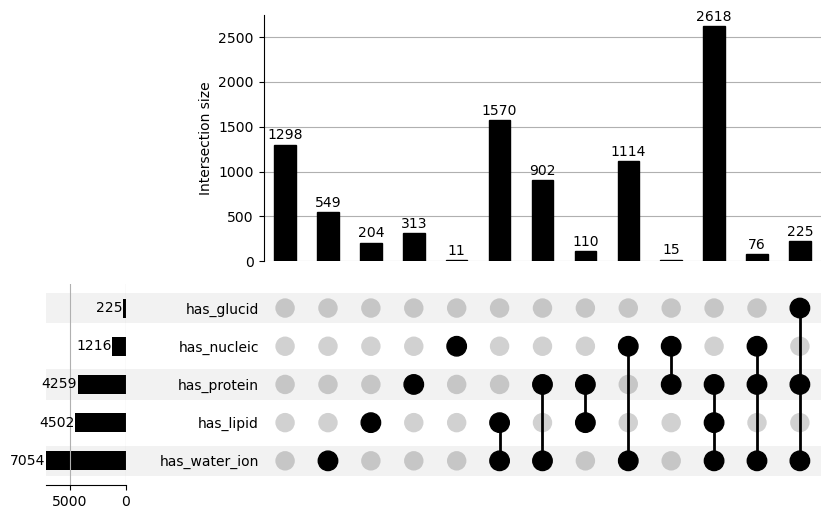

In [10]:
plt.rcParams.update({"font.size": 10})
_ = upsetplot = UpSet(sr_upset, show_counts=True, element_size=40).plot()

## Watermark

In [11]:
%load_ext watermark
%watermark --python --machine
print("")
# Versions for jupyterlab, imported packages and watermark itself
%watermark --packages jupyterlab,upsetplot --iversions --watermark
# Name of conda environment
%watermark --conda

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.5.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 5.15.0-48-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit


jupyterlab: 3.4.8
upsetplot : 0.6.1

pandas    : 1.5.0
numpy     : 1.23.3
matplotlib: 3.5.3
yaml      : 6.0

Watermark: 2.3.1

conda environment: mdws

